In [1]:
import  os

folder           =  r'D:\DrPKV\20220618\DrPKV-main'
file1            =  r'D:\DrPKV\20220618\Output\Predicted_Values_train_data_2022_06_23_21_05_47.csv'
file2            =  r'D:\DrPKV\20220618\Output\Predicted_Values_test_data_2022_06_23_21_05_47.csv'

os.chdir(folder)


In [2]:
import   pandas            as      pd
from     sklearn           import  metrics
import   seaborn           as      sns
import   matplotlib.pyplot as      plt

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
def measures_cm(model, datatype, act, pred):
   
    c_matrix = pd.crosstab(act,pred, rownames=['Actual'], colnames=['Predicted'])

    print("\nModel performance of %s" %model)
    print("\nDataset used %s" %datatype)

    sns.heatmap(c_matrix, annot = True, fmt = '.6g')
    plt.show()
    
    print('Accuacy %f' % metrics.accuracy_score(act, pred)) # print accuracy of model
    print('Precision %f' % metrics.precision_score(act, pred)) # print precision value of model
    print('Recall %f' % metrics.recall_score(act, pred)) # print recall value of model
    print('AUROC %f' % metrics.roc_auc_score(act, pred)) # print AUROC value of model

In [5]:
df_train       =    pd.read_csv(file1)
print('Train data shape {}'.format(df_train.shape))

Train data shape (37800, 3)


In [6]:
df_train.columns

Index(['Train_y_true', 'Train_y_pred', 'Model'], dtype='object')

In [7]:
df_test       =    pd.read_csv(file2)
print('Test data shape {}'.format(df_test.shape))

Test data shape (16200, 3)


In [8]:
df_test.columns

Index(['Test_y_true', 'Test_y_pred', 'Model'], dtype='object')

In [9]:
df_test['Model'].value_counts()

LR      2700
CART    2700
RF      2700
SVC     2700
LDA     2700
KNN     2700
Name: Model, dtype: int64


Model performance of LR

Dataset used Training dataset


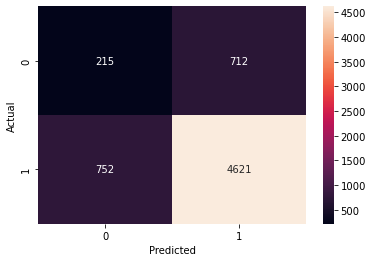

Accuacy 0.767619
Precision 0.866492
Recall 0.860041
AUROC 0.545986

Model performance of LR

Dataset used Test dataset


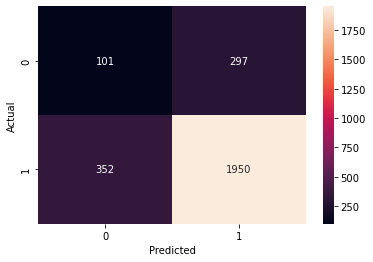

Accuacy 0.759630
Precision 0.867824
Recall 0.847089
AUROC 0.550429

Model performance of CART

Dataset used Training dataset


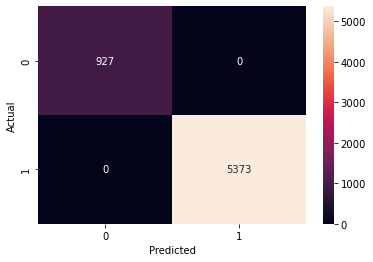

Accuacy 1.000000
Precision 1.000000
Recall 1.000000
AUROC 1.000000

Model performance of CART

Dataset used Test dataset


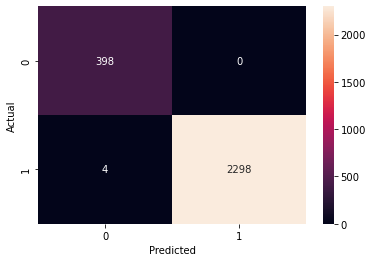

Accuacy 0.998519
Precision 1.000000
Recall 0.998262
AUROC 0.999131

Model performance of RF

Dataset used Training dataset


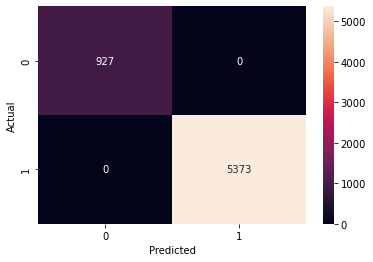

Accuacy 1.000000
Precision 1.000000
Recall 1.000000
AUROC 1.000000

Model performance of RF

Dataset used Test dataset


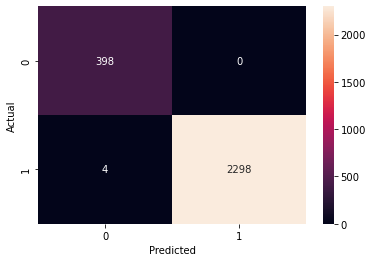

Accuacy 0.998519
Precision 1.000000
Recall 0.998262
AUROC 0.999131

Model performance of SVC

Dataset used Training dataset


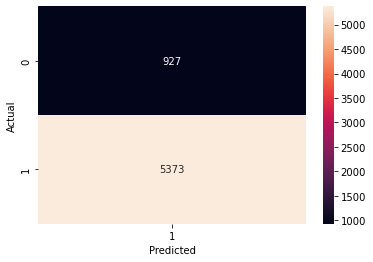

Accuacy 0.852857
Precision 0.852857
Recall 1.000000
AUROC 0.500000

Model performance of SVC

Dataset used Test dataset


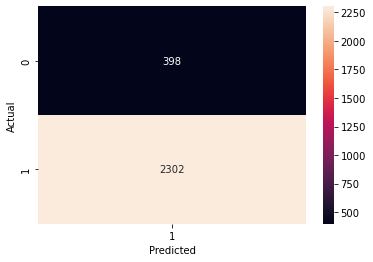

Accuacy 0.852593
Precision 0.852593
Recall 1.000000
AUROC 0.500000

Model performance of LDA

Dataset used Training dataset


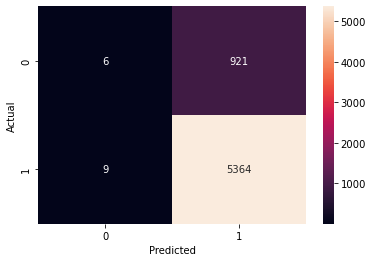

Accuacy 0.852381
Precision 0.853461
Recall 0.998325
AUROC 0.502399

Model performance of LDA

Dataset used Test dataset


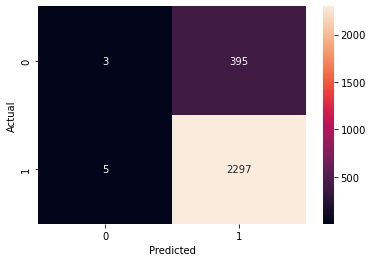

Accuacy 0.851852
Precision 0.853269
Recall 0.997828
AUROC 0.502683

Model performance of KNN

Dataset used Training dataset


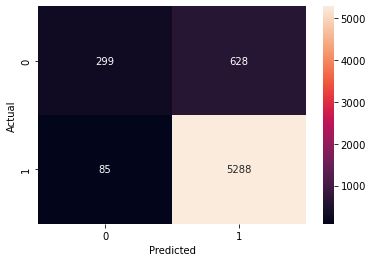

Accuacy 0.886825
Precision 0.893847
Recall 0.984180
AUROC 0.653363

Model performance of KNN

Dataset used Test dataset


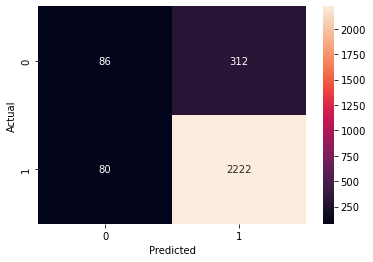

Accuacy 0.854815
Precision 0.876875
Recall 0.965248
AUROC 0.590664


In [10]:
Models_list =   ['Logistic Regression', 'CART', 'Random Forest', 'SVM', 'LDA', 'KNN']
datatypes   =   ['Training dataset', 'Test dataset']
Models      =   ['LR','CART', 'RF', 'SVC', 'LDA', 'KNN']

for each in Models:
    act_tr     =   df_train.loc[df_train['Model'] == each, 'Train_y_true']  
    pred_tr    =   df_train.loc[df_train['Model'] == each, 'Train_y_pred']  
    act_test   =   df_test.loc[df_test['Model'] == each, 'Test_y_true']  
    pred_test  =   df_test.loc[df_test['Model'] == each, 'Test_y_pred']      
    measures_cm(each, 'Training dataset', act_tr, pred_tr)
    measures_cm(each, 'Test dataset', act_test, pred_test)   